# Multi Layer Perceptron Model 8 : **website-classification Dataset**:

In [41]:
# Dataset from Kaggle
!kaggle datasets download -d hetulmehta/website-classification

Dataset URL: https://www.kaggle.com/datasets/hetulmehta/website-classification
License(s): CC0-1.0
  0% 0.00/2.00M [00:00<?, ?B/s]
100% 2.00M/2.00M [00:00<00:00, 48.8MB/s]


In [42]:
# unzip the downloaded dataset
! unzip /content/website-classification.zip

Archive:  /content/website-classification.zip
  inflating: website_classification.csv  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                          Adult       1.00      0.75      0.86         4
             Business/Corporate       0.73      0.94      0.82        17
       Computers and Technology       0.76      0.84      0.80        19
                     E-Commerce       1.00      0.95      0.98        22
                      Education       1.00      0.89      0.94        27
                           Food       0.94      0.94      0.94        17
                         Forums       0.00      0.00      0.00         2
                          Games       1.00      0.82      0.90        22
             Health and Fitness       1.00      1.00      1.00        13
             Law and Government       0.96      1.00      0.98        23
                           News       0.94      0.89      0.91        18
                    Photography       0.90      0.95      0.93        20
Social Networking and Messaging       1.00      0.

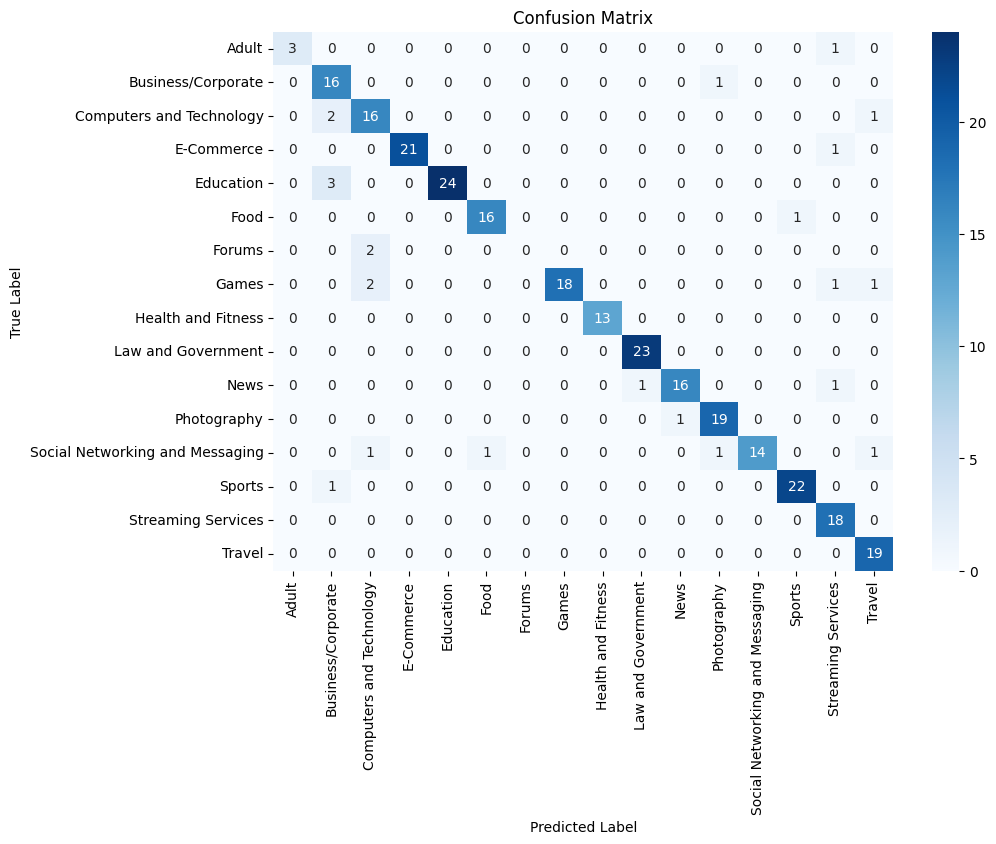

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.read_csv('./website_classification.csv')

df = pd.DataFrame(data)

# Encode the target variable
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_website_text'], df['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_vec)

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(len(le.classes_)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
